# Problem Set 6
Bethany Bailey

In [1]:
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz

/Users/bethanybailey/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 1
### (a)

In [2]:
biden = pd.read_csv('biden.csv')
biden.head()

,biden,female,age,educ,dem,rep
0,90,0,19,12,1,0
1,70,1,51,14,1,0
2,60,0,27,14,0,0
3,50,1,43,14,1,0
4,60,1,38,14,0,1


In [3]:
len(biden)

1807

In [4]:
y = biden['biden'].values
X = biden[['female', 'age', 'educ', 'dem', 'rep']].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3,
                                                    random_state=25)

In [5]:
# Because it was not requested in the problem, I did not set any guidelines such as a max_depth.
b_tree = DecisionTreeRegressor()
b_tree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [6]:
b_tree_viz = export_graphviz(
    b_tree,
    out_file=None,
    class_names = b_tree.classes_,
    feature_names = biden.columns[1:],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz)
graph.render('b_tree_viz')
graph

In [7]:
y_pred = b_tree.predict(X_test)

In [8]:
MSE1 = mean_squared_error(y_test, y_pred)
print('Test MSE=', MSE1)

Test MSE= 718.478712004


As mentioned above, I did not choose any limiting variables for this tree because it was not requested in the problem. 

I will only describe the first three layers of the above tree for simplicity's sake. The nodes tell us the following information: the first node indicates that there is a large split between democrate and republican, with democrats (>0.5) liking biden more than republicans. These democrats like Biden more if there are over 54.5. If these democrats over 54.5 are educated for more than 4.5 years, they have a mean feeling thermometer rating of 77.944 towards Biden, but those with less than 4.5 years of education (of which there are 3) have a mean score of 100. If these democrats are younger than 54.5, then they are also divided by their education level: those with more than 15.5 years of education (late college into grad school) have a slightly higher feeling thermometer on average (76.591) than those with less than 15.5 years of education (71.105).

The non-democrats (dem less than 0.5) are then divided into whether or not they identify as republican. 256 identify as republican, and of these, females like Biden more than non-females (44.887 vs. 39.333). If they do not identify as republican, they on average like Biden more, and again the females of this group like Biden more on average than the males (61.266 vs. 56.489). 

Thus, for non-democrats, party and gender matter the most, and for democrats, age and education matter the most.

### (b)

In [9]:
for i in range(1,11):
    b_tree = DecisionTreeRegressor(max_depth=i)
    b_tree.fit(X_train, y_train)
    y_pred = b_tree.predict(X_test)
    MSE1 = mean_squared_error(y_test, y_pred)
    print('Test MSE for', i, 'max_depth=', MSE1)

Test MSE for 1 max_depth= 420.022452935
Test MSE for 2 max_depth= 400.065398184
Test MSE for 3 max_depth= 394.761999922
Test MSE for 4 max_depth= 400.113290357
Test MSE for 5 max_depth= 408.105635702
Test MSE for 6 max_depth= 426.046570797
Test MSE for 7 max_depth= 463.788405437
Test MSE for 8 max_depth= 527.504287748
Test MSE for 9 max_depth= 549.206767151
Test MSE for 10 max_depth= 563.83079352


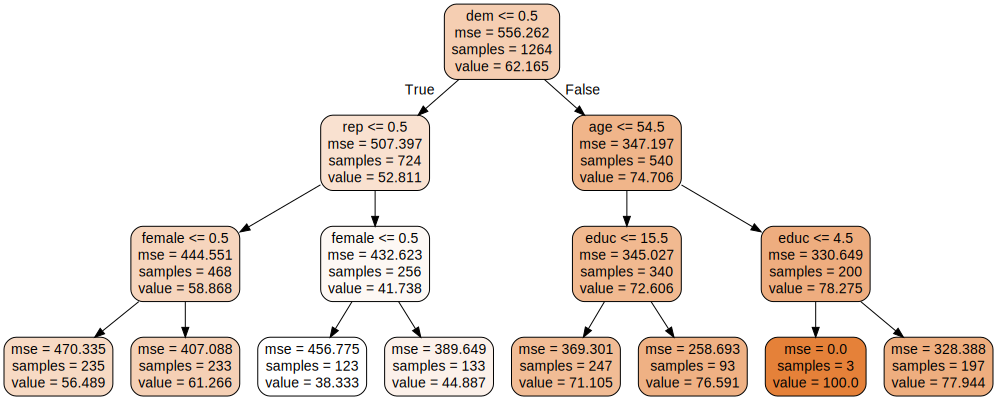

In [10]:
b_tree2 = DecisionTreeRegressor(max_depth=3)
b_tree2.fit(X_train, y_train)

b_tree_viz2 = export_graphviz(
    b_tree2,
    out_file=None,
    class_names = b_tree2.classes_,
    feature_names = biden.columns[1:],
    rounded=True,
    filled=True,
)

graph = graphviz.Source(b_tree_viz2)
graph.render('b_tree_viz2')
graph

The best tree has max_depth=3. The MSE here is 394.761999922. This MSE was the lowest for the first few tree depths (max_depth=1 has MSE of 420, max_depth=2 has MSE of 400, max_depth=4 has MSE of 400, and max_depth=5 has MSE of 407). Doing this pruning does improve the test MSE and make the results easier to interpret.

For this tree, the nodes are the same as the first three layers of the tree in (a), so I will not redescribe them here.

### (c)

In [11]:
from sklearn.ensemble import BaggingRegressor

In [12]:
b_tree_bag = BaggingRegressor(DecisionTreeRegressor(), n_estimators=100,
                             max_samples=100, bootstrap=True, oob_score=True, random_state=15)
b_tree_bag.fit(X, y)

BaggingRegressor(base_estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=100, n_estimators=100, n_jobs=1, oob_score=True,
         random_state=15, verbose=0, warm_start=False)

In [13]:
b_tree_bag.score(X, y)
y_pred_bag = b_tree_bag.oob_prediction_
MSE3 = mean_squared_error(y, y_pred_bag)
print('MSE=', MSE3)

MSE= 406.000558395


In [14]:
var_importances = np.mean([est.feature_importances_ for est in b_tree_bag.estimators_], axis=0)

indices = np.argsort(var_importances)[::-1]

var_names = ['female', 'age', 'dem', 'rep', 'educ']
print("Variable importance measures are as follows:")
for f in range(0,5):
    print(f'{f+1}. {var_names[indices[f]]}:,{var_importances[indices[f]]}')

Variable importance measures are as follows:
1. age:,0.4429127039606069
2. dem:,0.20057625971613363
3. rep:,0.19032354439169072
4. educ:,0.10602822551257896
5. female:,0.06015926641898977


In [15]:
var_importances

array([ 0.06015927,  0.4429127 ,  0.20057626,  0.19032354,  0.10602823])

Age is the most important variable in this model, followed by dem and then rep.

### (d)

In [16]:
from sklearn.ensemble import RandomForestRegressor

In [17]:
# For the below random forest models, I chose n_estimators=100 because, upon doing a for-loop with
# many n_estimators, 100 seemed like the point that would be close to minimizing the amount
# of computational work necessary while also making MSE low. This is just for comparing the numbers of m. 
b_tree4 = RandomForestRegressor(max_features=1, n_estimators=100, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree4.fit(X, y)

b_tree4.score(X, y)
y_pred5 = b_tree4.oob_prediction_
MSE4 = mean_squared_error(y, y_pred5)
print('MSE for m=2 is', MSE4)

MSE for m=2 is 530.846244653


In [25]:
var_importances = np.mean([est.feature_importances_ for est in b_tree4.estimators_], axis=0)

indices = np.argsort(var_importances)[::-1]

var_names = ['female', 'age', 'dem', 'rep', 'educ']
print("Variable importance measures for m=1 RFM are as follows:")
for f in range(0,5):
    print(f'{f+1}. {var_names[indices[f]]}:,{var_importances[indices[f]]}')

Variable importance measures for m=1 RFM are as follows:
1. age:,0.5124882720910658
2. rep:,0.1860672704048324
3. dem:,0.1491329217870436
4. educ:,0.13014566088067936
5. female:,0.022165874836378857


In [19]:
b_tree5 = RandomForestRegressor(max_features=2, n_estimators=100, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree5.fit(X, y)

b_tree5.score(X, y)
y_pred5 = b_tree5.oob_prediction_
MSE5 = mean_squared_error(y, y_pred5)
print('MSE for m=2 is', MSE5)

MSE for m=2 is 535.734919575


In [22]:
var_importances = np.mean([est.feature_importances_ for est in b_tree5.estimators_], axis=0)

indices = np.argsort(var_importances)[::-1]

var_names = ['female', 'age', 'dem', 'rep', 'educ']
print("Variable importance measures for m=1 RFM are as follows:")
for f in range(0,5):
    print(f'{f+1}. {var_names[indices[f]]}:,{var_importances[indices[f]]}')

Variable importance measures for m=1 RFM are as follows:
1. age:,0.5098609102863834
2. rep:,0.18820049701641825
3. dem:,0.15019782627837594
4. educ:,0.12992313008374012
5. female:,0.02181763633508236


In [23]:
b_tree6 = RandomForestRegressor(max_features=3, n_estimators=100, bootstrap=True,
                                  oob_score=True, random_state=15)
b_tree6.fit(X, y)

b_tree6.score(X, y)
y_pred6 = b_tree6.oob_prediction_
MSE6 = mean_squared_error(y, y_pred6)
print('MSE for m=3 is', MSE6)

MSE for m=3 is 529.067842604


In [24]:
var_importances = np.mean([est.feature_importances_ for est in b_tree6.estimators_], axis=0)

indices = np.argsort(var_importances)[::-1]

var_names = ['female', 'age', 'dem', 'rep', 'educ']
print("Variable importance measures for m=1 RFM are as follows:")
for f in range(0,5):
    print(f'{f+1}. {var_names[indices[f]]}:,{var_importances[indices[f]]}')

Variable importance measures for m=1 RFM are as follows:
1. age:,0.4864102441841255
2. rep:,0.20127298411380395
3. dem:,0.1629421007871502
4. educ:,0.12017923161647101
5. female:,0.02919543929844895


M (the number of variables considered in each split) influences the MSE by first raising it from m=1 (MSE=530.846) to m=2 (MSE=535.735), and then lowering it again form m=3 (MSE=529.068). Thus, m=3 is the best number of variables. This makes sense, because a good rule of thumb is to use m=sqrt(num_features), which would be sqrt(5), which is over 2. 

In all cases, the age variable is the most important variable.